# Рынок заведений общественного питания Москвы

Этот проект посвящен анализу открытых данных о заведениях общественного питания в Москве. Анализ будет использоваться для представления инвесторам информации о рынке общественного питания для открытия собственного кафе.

## Обзор данных

В этом разделе мы загрузим необходимые для работы библиотеки и базу данных, проведем обзор имеющихся данных, идентифицируем проблемы с данными, которые устраним дальше на этапе предобработки данных. 

Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from io import BytesIO
import requests

Загрузка базы данных и просмотр первых 10 строчек

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')
df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Просмотр общей информации о датафрейме

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Согласно документации, датафрейм содержит следующие переменные:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест


В датафрейме есть несколько проблем:
* Переменная `id` имеет тип `int64`, однако идентификаторы - это категориальные переменные, с которыми мы не будем проводить математических операций, так что лучше сделать их категориальными
* Названия кафе и улиц написаны разными регистрами. Для того, чтобы не пропустить дубликаты, стоит привести переменные `object_name` и `address` к нижнему регистру
* В переменной `address` повторяется подстрочка "Город Москва, ". Имеет смысл удалить эту часть и оставить только улицы, так как и без указания города мы знаем, что рассматриваем рынок общественного питания в Москве
* Стоит проверить сетевые заведения на наличие заведений, имеющих только одну точку (то есть по сути не являющихся сетевыми)

### Вывод по разделу

В этом разделе мы загрузили библиотеки и датафрейм для работы, провели обзор данных и пришли к выводу, что нужно сделать переменную `id` категориальной, переменные `object_name` и `address` привести к нижнему регистру, в переменной `address` удалить подстрочку "Город Москва, "

Также стоит проверить датафрейм на наличие дубликатов, а также проверить, есть ли сетевые заведения, имеющие 1 точку в своей сети

## Предобработка данных

### Изменение типа данных

Делаем переменную `id` категориальной, затем просматриваем общую информацию о датафрейме

In [4]:
df['id'] = df['id'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null object
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(1), object(5)
memory usage: 720.4+ KB


### Приведение текстовых переменных к нижнему регистру

Приводим текст в переменных `object_name` и `address` к нижнему регистру

In [5]:
columns_to_change = ['object_name', 'address']
for column in columns_to_change:
    df[column] = df[column].str.lower()
df[['object_name', 'address']].head(10)

,object_name,address
0,сметана,"город москва, улица егора абакумова, дом 9"
1,родник,"город москва, улица талалихина, дом 2/1, корпус 1"
2,кафе «академия»,"город москва, абельмановская улица, дом 6"
3,пиццетория,"город москва, абрамцевская улица, дом 1"
4,кафе «вишневая метель»,"город москва, абрамцевская улица, дом 9, корпус 1"
5,стол. при гоу сош № 1051,"город москва, абрамцевская улица, дом 15, корп..."
6,брусника,"город москва, переулок сивцев вражек, дом 6/2"
7,буфет мтуси,"город москва, авиамоторная улица, дом 8, строе..."
8,кпф семья-1,"город москва, авиамоторная улица, дом 8, строе..."
9,столовая мтуси,"город москва, авиамоторная улица, дом 8, строе..."


### Обработка дубликатов

Выводим число дубликатов. Их оказывается 0

In [6]:
print('Число дубликатов:', df.duplicated().sum())

Число дубликатов: 0


Также проверим, есть ли дубликаты при выборе всех колонок за исключением колонки `id`. Дубликатов оказывается 150. Получается, что объектам, совпадающим полностью, в базе были приписаны разные id, так что с помощью идентификационных номеров они переставали быть дубликатами.

In [7]:
print('Число дубликатов (без колонки id):', df.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number'], keep=False).sum())

Число дубликатов (без колонки id): 150


Удаляем найденные дубликаты, выводим число дубликатов после удаления. Их оказывается 0.

In [8]:
df = df.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number']).reset_index(drop=True)
print('Число дубликатов после удаления:', df.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number'], keep=False).sum())

Число дубликатов после удаления: 0


### Проверка сетевых заведений

Также стоит проверить сетевые заведения на предмет того, являются ли они сетевыми на самом деле. Для этого выберем сетевые заведения, подсчитаем число заведений в них и выведем те заведения, которые являются сетевыми, но при этом имеют одно заведение. Таких мест оказывается 331

In [9]:
chains_with_one_place = df.query('chain == "да"').groupby('object_name').agg({'id': 'count'}).query('id == 1').reset_index()
chains_with_one_place

,object_name,id
0,beverly hills diner,1
1,bierloga,1
2,black & white,1
3,boobo,1
4,bubbleology,1
...,...,...
326,якитория и спорт бар,1
327,якитория и ян примус,1
328,ямми микс,1
329,ян примус,1


В исходном датафрейме находим заведения, которые являются сетевыми и имеют одно заведение, и делаем их несетевыми. На всякий случай проверяем, является ли заведение "Beverly Hills diner" (первое в предыдущем выведенном датафрейме) сетевым после замены.

In [10]:
df.loc[df['object_name'].isin(chains_with_one_place['object_name']), 'chain'] = 'нет'
df.query('object_name == "beverly hills diner"')

,id,object_name,chain,object_type,address,number
13319,193929,beverly hills diner,нет,ресторан,"город москва, никольская улица, дом 10",88


### Удаление города из адреса

Удаляем подстрочки "город москва, ", "город зеленоград, " и "поселение сосенское, " из переменной `address`. В итоге остаются только улицы

In [11]:
df['address'] = df['address'].replace('город москва, ', '', regex=True)
df['address'] = df['address'].replace('город зеленоград, ', '', regex=True)
df['address'] = df['address'].replace('поселение сосенское, ', '', regex=True)
df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,нет,столовая,"абрамцевская улица, дом 15, корпус 1",240
6,148815,брусника,да,кафе,"переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,нет,столовая,"авиамоторная улица, дом 8, строение 1",90
8,20958,кпф семья-1,нет,столовая,"авиамоторная улица, дом 8, строение 1",150
9,28858,столовая мтуси,нет,столовая,"авиамоторная улица, дом 8, строение 1",120


### Вывод по разделу

В этом разделе мы провели предобработку данных:
* Изменили тип данных в переменной `id` на `object`
* Привели текстовые переменные `object_name` и `address` к нижнему регистру
* Удалили дубликаты из датафрейма
* Сделали сетевые заведения, имеющие одну точку, несетевыми
* В переменной `address` удалили указание на город, оставили только названия улиц

## Анализ данных

В этом разделе мы проведем анализ данных по следующим пунктам:
* Соотношение видов объектов общественного питания по количеству
* Соотношение сетевых и несетевых заведений по количеству
* Изучение того, для какого вида объекта общественного питания характерно сетевое распространение
* Изучение того, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест
* Среднее количество посадочных мест для каждого вида объекта общественного питания
* Создание топ-10 улиц по количеству объектов общественного питания
* Поиск числа улиц с одним объектом общественного питания
* Изучение распределения количества посадочных мест для улиц с большим количеством объектов общественного питания

### Соотношение видов объектов общественного питания по количеству

Сначала рассмотрим, как соотносятся виды объектов общественного питания. Построим столбчатую диаграмму. Больше всего в Москве кафе, эта категория лидирует с большим отрывом. Далее идут столовая и ресторан. Меньше всего в Москве кулинарий в продуктовых магазинах

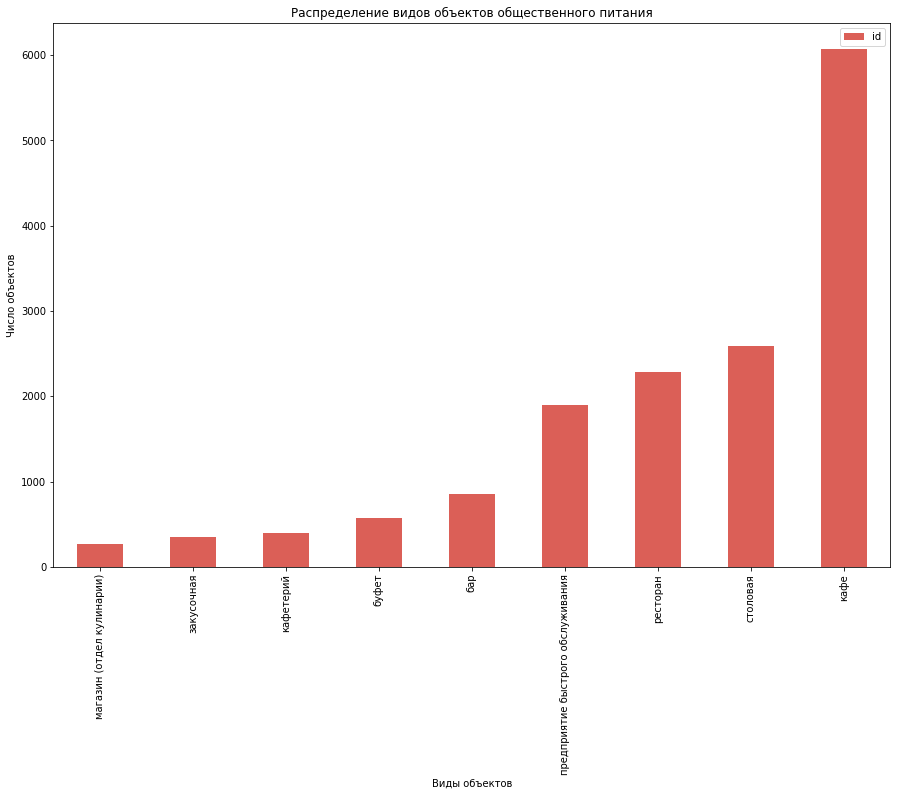

In [12]:
sns.set_palette("hls", 4)
df.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id').plot(kind='bar', figsize=(15, 10))
plt.title('Распределение видов объектов общественного питания')
plt.xlabel('Виды объектов')
plt.ylabel('Число объектов')
plt.show()

### Распределение сетевых и несетевых заведений по типам

Рассмотрим распределение сетевых и несетевых заведений в Москве по типам объектов общественного питания. Как мы видели в предыдущем разделе, большинство заведений - несетевые, однако их доля в разных типах заведений различается. Как мы можем видеть на графике, есть заведения, в которых доля сетевых компаний стремится к 0 (столовая, буфет), есть те заведения, в которых доля сетевых заведений довольно высока (предприятия быстрого обслуживания, рестораны, кафе).

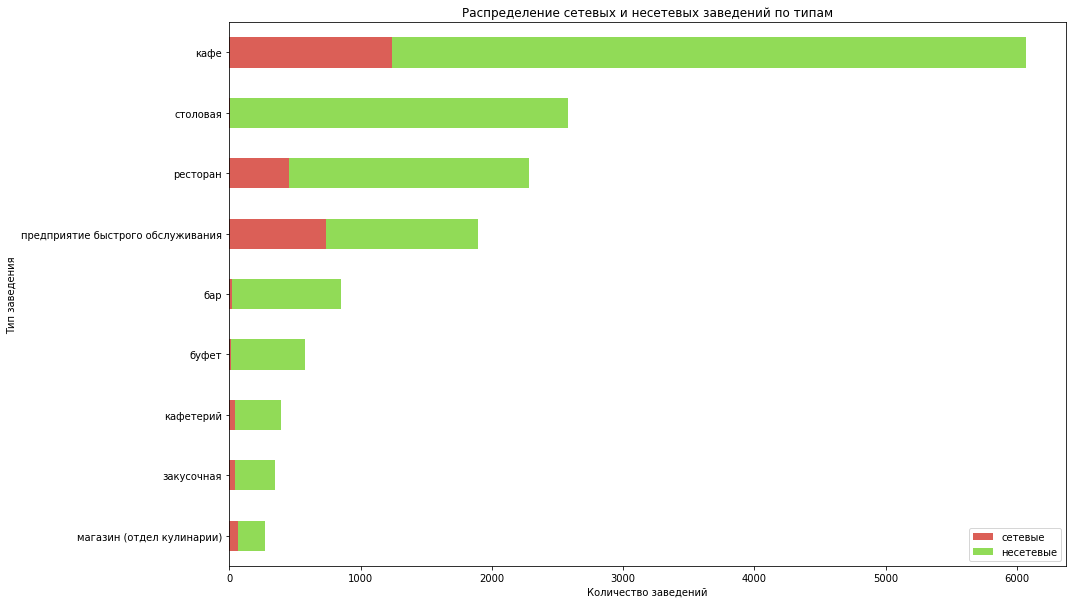

In [14]:
chain_type = df.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count')
chain_type.columns = ['сетевые', 'несетевые']
chain_type['total'] = chain_type['сетевые'] + chain_type['несетевые']
chain_type.sort_values(by='total')[['сетевые', 'несетевые']].plot(kind='barh', stacked=True, figsize=(15, 10))
plt.title('Распределение сетевых и несетевых заведений по типам')
plt.xlabel('Количество заведений')
plt.ylabel('Тип заведения')
plt.show()

Для более подробного сравнения долей сетевых заведений между разными типами объектов общественного питания создадим столбец в сводной таблице с долей сетевых заведений. Как мы видим, по доле сетевых заведений лидируют предприятия быстрого обслуживания (39 % - сетевые заведения). Далее около четверти заведений в категории магазинов - сетевые, около 1/5 в категории ресторанов и кафе - сетевые. Практически нулевая доля сетевых заведений в категориях столовых, баров и буфетов. Таким образом, мы можем сделать вывод, что сетевое распространение характерно для ресторанов фаст-фуда

In [15]:
chain_type['доля сетевых заведений'] = round(chain_type['сетевые'] / chain_type['total'], 2)
chain_type.sort_values(by='доля сетевых заведений')

,сетевые,несетевые,total,доля сетевых заведений
object_type,,,,
столовая,3,2581,2584,0.00
бар,19,836,855,0.02
буфет,11,565,576,0.02
кафетерий,46,349,395,0.12
закусочная,45,303,348,0.13
кафе,1243,4828,6071,0.20
ресторан,455,1827,2282,0.20
магазин (отдел кулинарии),70,203,273,0.26
предприятие быстрого обслуживания,741,1156,1897,0.39


### Распределение числа мест и количества заведений в сетевых ресторанах

Для изучения распределения числа посадочных мест и заведений в сетях отбираем сетевые заведения, а затем подсчитываем медианы числа мест и заведений. Затем задаем функции, в которых сравниваем каждое заведение с медианами, и, если значение выше медианы, то категоризируем заведение как "Много заведений / мест", а если меньше, то "Мало заведений / мест". Затем объединяем полученные категории в одну. Итого у нас получается 4 категории заведений:
* Много заведений - много мест (число мест и заведений в сети больше медианного)
* Много заведений - мало мест (число заведений в сети больше медианного, число мест - меньше или равно)
* Мало заведений - много мест (число мест в сети больше медианного, число заведений - меньше или равно)
* Мало заведений - мало мест (число мест и заведений в сети меньше или равно медианному)

In [16]:
# отбор сетевых заведений
chain_rest = df.query('chain == "да"').groupby('object_name').agg({'id': 'count', 'number': 'mean'})

# медианы числа заведений и посадочных мест
places_median = chain_rest['id'].median()
seats_median = chain_rest['number'].median()

# функции для сравнения каждого значения с медианами
def group_places(places):
    if places > places_median:
        return 'Много заведений'
    else:
        return 'Мало заведений'
    
def group_seats(seats):
    if seats > seats_median:
        return 'Много мест'
    else:
        return 'Мало мест'

# применение функций для столбцов в датафрейме
chain_rest['places'] = chain_rest['id'].apply(group_places)
chain_rest['seats'] = chain_rest['number'].apply(group_seats)

# объединение в группу и просмотр датафрейма
chain_rest['group'] = chain_rest['places'].astype(str) + ' - ' + chain_rest['seats'].astype(str)
chain_rest.head(10)

,id,number,places,seats,group
object_name,,,,,
bocconcino,3,66.666667,Мало заведений,Много мест,Мало заведений - Много мест
burger club,3,20.333333,Мало заведений,Мало мест,Мало заведений - Мало мест
coffeeshop company,4,47.250000,Мало заведений,Много мест,Мало заведений - Много мест
cofix,25,9.600000,Много заведений,Мало мест,Много заведений - Мало мест
correas,3,44.000000,Мало заведений,Мало мест,Мало заведений - Мало мест
costa coffee,5,18.800000,Много заведений,Мало мест,Много заведений - Мало мест
dunkin donuts,6,11.500000,Много заведений,Мало мест,Много заведений - Мало мест
glowsubs sandwiches,3,17.333333,Мало заведений,Мало мест,Мало заведений - Мало мест
healthy food,4,11.500000,Мало заведений,Мало мест,Мало заведений - Мало мест


Построим диаграмму рассеяния между числом заведений и посадочных мест в сетевых заведениях. Введем третье измерение - категория заведения. В целом, по диаграмме нельзя сказать, что есть умеренная или сильная линейная связь между этими категориями. Если связь и есть, то слабой выраженности.

Также можно заметить, что большинство сетевых заведений сконцентрированы в районе до 20 заведений, то есть большие сети мало распространены. В числе посадочных мест мы можем наблюдать больший разброс - достаточно много заведений имеют порядка 100-150 мест. Таким образом, можно предварительно сделать вывод, что сетевые заведения скорее предпочитают иметь большое количество посадочных мест и мало заведений в сети.

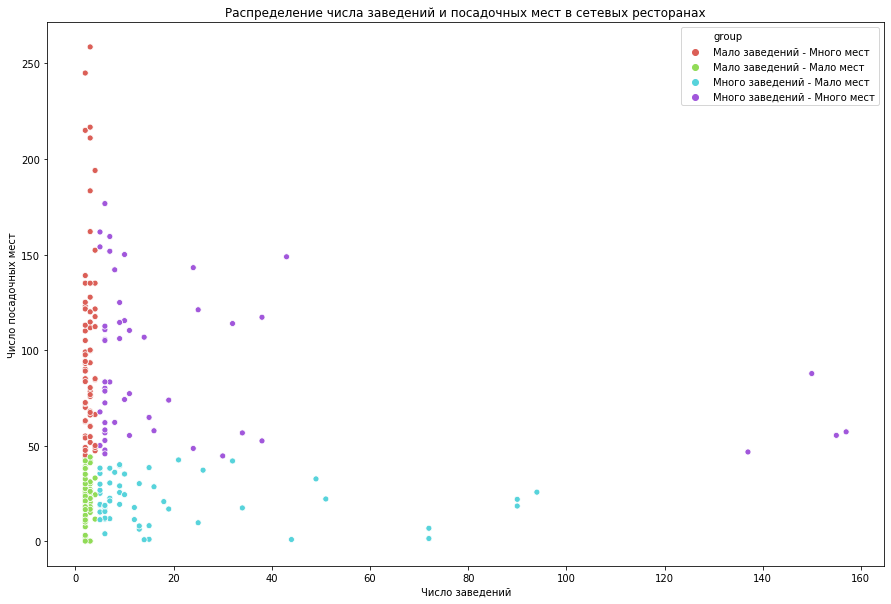

In [17]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=chain_rest, x='id', y='number', hue='group')
plt.title('Распределение числа заведений и посадочных мест в сетевых ресторанах')
plt.xlabel('Число заведений')
plt.ylabel('Число посадочных мест')
plt.show()

Рассмотрим коэффициенты корреляции между числом заведений и числом посадочных мест. Как мы видим, для маленьких сетей коэффициенты практически нулевые, так что связей между этими показателями на наших данных не обнаруживается. Вероятно, для маленьких сетей выбор между числом заведений и числом посадочных мест не так актуален. С выбором между заведениями и местами сталкиваются большие сети: на наших данных мы можем видеть слабую отрицательную связь между показателями в обеих группах. То есть чем больше заведений в сети, тем меньше в них посадочных мест, и наоборот. Как мы увидели на диаграмме рассеяния, все-таки сети чаще предпочитают увеличивать число посадочных мест, чем открывать новые филиалы.

In [18]:
groups = ['Много заведений - Много мест', 'Много заведений - Мало мест', 'Мало заведений - Много мест', 'Мало заведений - Мало мест']
for group in groups:
    print('Коэффициент корреляции в группе', group, ':',
          round(chain_rest.loc[chain_rest['group']==group, 'id'].corr(chain_rest.loc[chain_rest['group']==group,
                                                                                     'number']), 2))

Коэффициент корреляции в группе Много заведений - Много мест : -0.22
Коэффициент корреляции в группе Много заведений - Мало мест : -0.14
Коэффициент корреляции в группе Мало заведений - Много мест : 0.07
Коэффициент корреляции в группе Мало заведений - Мало мест : 0.08


### Среднее число посадочных мест для каждого типа объекта общественного питания

Построим столбчатую диаграмму со средним числом посадочных мест в разных типах объектов общественного питания. Лидерами по среднему числу мест являются столовая, ресторан и буфет. Меньше всего посадочных мест в отделах кулинарии продуктовых магазинов.

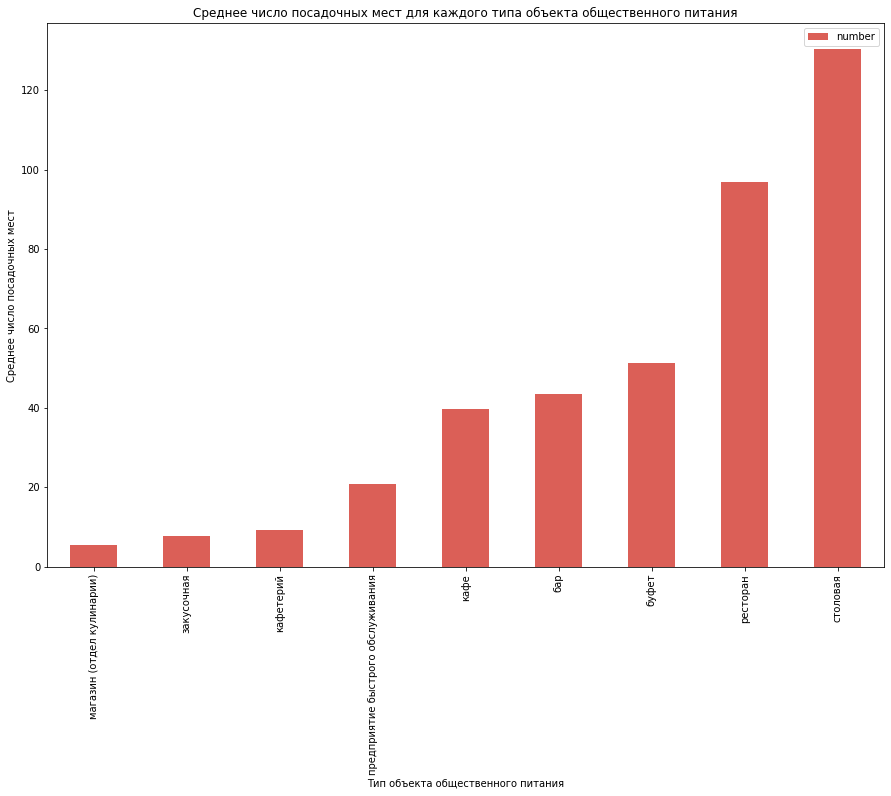

In [19]:
df.pivot_table(index='object_type', values='number').sort_values(by='number').plot(kind='bar', figsize=(15, 10))
plt.title('Среднее число посадочных мест для каждого типа объекта общественного питания')
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Среднее число посадочных мест')
plt.show()

### Топ-10 улиц по количеству объектов общественного питания

Перед тем, как выделить топ-10 улиц по количеству заведений общественного питания, выделим улицы в отдельную переменную и выведем получившийся датафрейм на экран

In [20]:
df['street'] = df['address'].apply(lambda x: x.split(',')[0])
df['street'] = df['street'].str.strip()
df.head(10)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,нет,столовая,"абрамцевская улица, дом 15, корпус 1",240,абрамцевская улица
6,148815,брусника,да,кафе,"переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,20957,буфет мтуси,нет,столовая,"авиамоторная улица, дом 8, строение 1",90,авиамоторная улица
8,20958,кпф семья-1,нет,столовая,"авиамоторная улица, дом 8, строение 1",150,авиамоторная улица
9,28858,столовая мтуси,нет,столовая,"авиамоторная улица, дом 8, строение 1",120,авиамоторная улица


Также загрузим данные об улицах Москвы и их административной принадлежности из справочника Мосгаза. Всего в этом справочнике есть данные о 4398 улицах. По получившемуся справочнику будем определять административный округ, в котором находятся топ-10 улиц.

In [21]:
spreadsheet_id = '11qr3silj85PWciNCb3jFlT3YKBfSh0GJ5PO3t9Kgr-Y'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_streets = pd.read_csv(BytesIO(r.content))
data_streets['streetname'] = data_streets['streetname'].str.lower()
data_streets

,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,вознесенский проезд,17,ЦАО,Пресненский район
4394,волков переулок,17,ЦАО,Пресненский район
4395,поварская улица,17,ЦАО,Пресненский район
4396,кудринская площадь,17,ЦАО,Пресненский район


Создадим сводную таблицу с топ-10 улиц, на которых находится больше всего заведений общественного питания. Соединим получившийся топ с данными Мосгаза и определим административные округа:
* Проспект Мира - ЦАО, СВАО
* Профсоюзная улица - ЮЗАО
* Ленинградский проспект - САО
* Пресненская набережная - ЦАО
* Варшавское шоссе - ЮЗАО, ЮАО
* Ленинский проспект - ЦАО, ЮАО, ЮЗАО, ЗАО
* Проспект Вернадского - ЮЗАО, ЗАО
* Кутузовский проспект - ЗАО
* Каширское шоссе - ЮАО
* Кировоградская улица - ЮАО

In [22]:
top_10_streets = df.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id', ascending=False).head(10).reset_index()
top_10_streets.columns = ['streetname', 'number_of_places']
final_data = top_10_streets.merge(data_streets, on='streetname', how='left')
final_data

,streetname,number_of_places,areaid,okrug,area
0,проспект мира,203,70,СВАО,Алексеевский район
1,проспект мира,203,86,СВАО,Ярославский Район
2,проспект мира,203,78,СВАО,Район Марьина роща
3,проспект мира,203,79,СВАО,Останкинский район
4,проспект мира,203,81,СВАО,Район Ростокино
5,проспект мира,203,82,СВАО,Район Свиблово
6,проспект мира,203,16,ЦАО,Мещанский район
7,профсоюзная улица,182,123,ЮЗАО,Академический район
8,профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,профсоюзная улица,182,134,ЮЗАО,Район Ясенево


Также сгруппируем получившийся топ-10 по административным округам и подсчитаем количество улиц в каждом. Выведем получившиеся административные округа на экран.

Таким образом, можно сделать вывод, что наиболее популярные округа для расположения заведений общественного питания - юг, юго-запад, запад и центр Москвы. На севере и северо-западе Москвы находится по одной популярной улице для мест общественного питания, ни одна улица с востока города не попала в топ-10. При этом стоит обратить внимание на то, что большинство улиц длинные (проспект, шоссе, которые, к тому же, входят в несколько административных округов), и, следовательно, можно предположить, что чем длиннее улица, тем больше мест общественного питания на ней расположено.

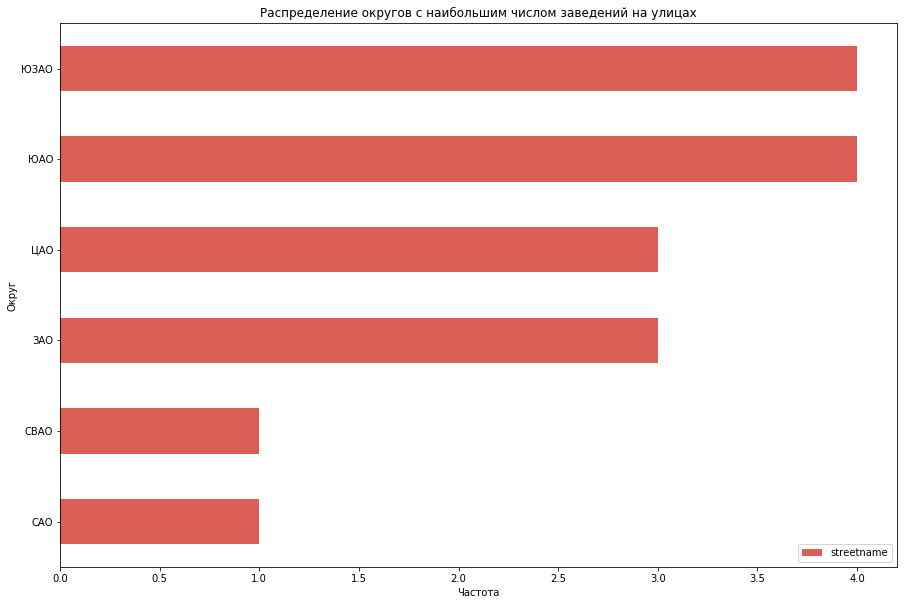

In [23]:
final_data.groupby('okrug').agg({'streetname': 'nunique'}).sort_values(by='streetname').plot(kind='barh', figsize=(15, 10))
plt.title('Распределение округов c наибольшим числом заведений на улицах')
plt.xlabel('Частота')
plt.ylabel('Округ')
plt.show()

### Улицы с одним объектом общественного питания

По аналогии с топ-10 улиц по количеству заведений создадим датафрейм с улицами, на которых расположено только одно кафе. Таких улиц оказывается 638. Объединим получившийся датафрейм с данными Мосгаза об административных округах, в которые входят улицы, и выведем на экран

In [24]:
streets_with_one_place = df.pivot_table(index='street', values='id', aggfunc='count').query('id == 1').reset_index()
streets_with_one_place.columns = ['streetname', 'number']
print('Число улиц с одним кафе:', len(streets_with_one_place))
streets_with_one_place_final = streets_with_one_place.merge(data_streets, on='streetname', how='left')
streets_with_one_place_final.head(10)

Число улиц с одним кафе: 638


,streetname,number,areaid,okrug,area
0,1-й балтийский переулок,1,54.0,САО,Район Аэропорт
1,1-й басманный переулок,1,13.0,ЦАО,Басманный район
2,1-й басманный переулок,1,15.0,ЦАО,Красносельский район
3,1-й ботанический проезд,1,82.0,СВАО,Район Свиблово
4,1-й вешняковский проезд,1,120.0,ЮВАО,Рязанский район
5,1-й голутвинский переулок,1,21.0,ЦАО,Район Якиманка
6,1-й зачатьевский переулок,1,20.0,ЦАО,Район Хамовники
7,1-й кирпичный переулок,1,36.0,ВАО,Район Соколиная Гора
8,1-й кожевнический переулок,1,98.0,ЮАО,Даниловский район
9,1-й кожуховский проезд,1,98.0,ЮАО,Даниловский район


Сгруппируем получившийся датафрейм по округам, подсчитаем количество уникальных улиц. На основе таблицы можно сделать вывод, что больше всего улиц с одним кафе находится в ЦАО, следом идут СВАО и ВАО. Можно предположить, что ЦАО лидирует из-за того, что улицы в центре могут быть короче (это косвенно подтверждают типы улиц в предыдущем выведенном датафрейме: "переулок", "проезд"), и поэтому на них в принципе может расположиться меньше заведений, чем на проспектах и шоссе.

Что касается северо-востока, востока и юго-востока Москвы, в предыдущем разделе мы уже увидели, что они не являются лидерами по количеству расположенных заведений. Вероятно, мы натолкнулись на определенное неравенство в потреблении между округами Москвы (запад и юго-запад, кажется, имеют более активную ресторанную инфраструктуру), и было бы интересно более подробно изучить причины этого неравенства.

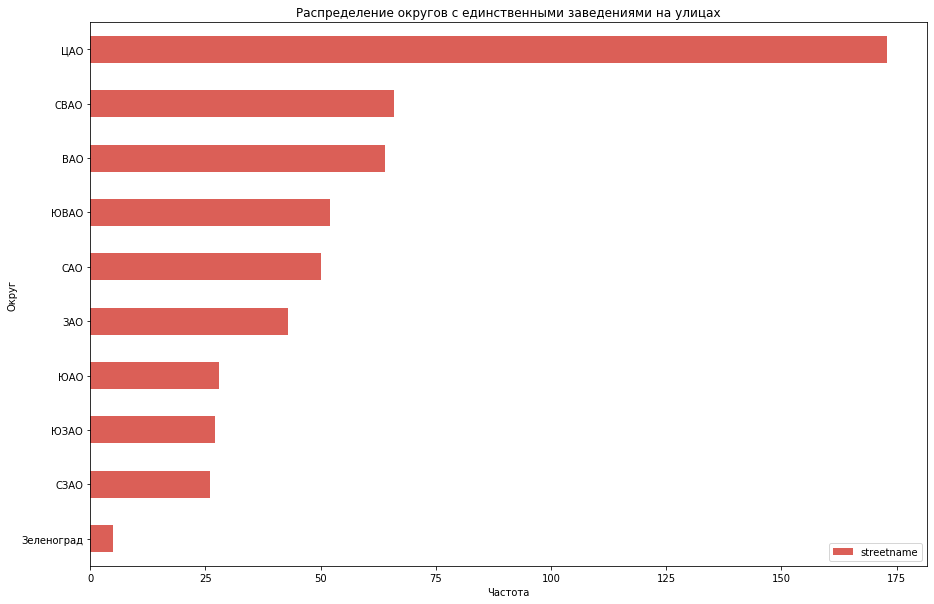

In [25]:
streets_with_one_place_final.groupby('okrug').agg({'streetname': 'nunique'}).sort_values(by='streetname').plot(kind='barh', figsize=(15, 10))
plt.title('Распределение округов с единственными заведениями на улицах')
plt.xlabel('Частота')
plt.ylabel('Округ')
plt.show()

### Распределение количества посадочных мест для улиц с большим числом заведений

Рассмотрим распределение посадочных мест на самых популярных улицах, на которых располагается больше всего заведений общественного питания. Отберем наиболее популярные улицы, затем построим диаграммы размаха числа посадочных мест для каждой из них. В целом, как мы можем видеть, боксплоты находятся примерно на одном уровне, а значит, скорее всего статистически значимых различий между числом мест на разных улицах не будет. Однако мы можем увидеть, что медианы немного выше в группе Ленинского, Кутузовского, Ленинградского проспектов, проспекта Мира.

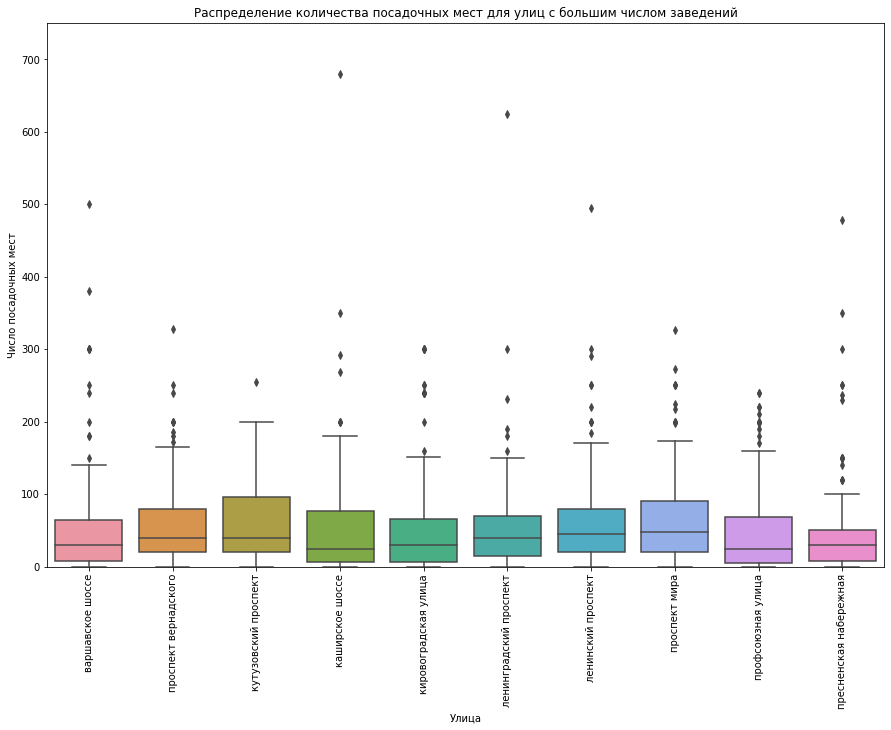

In [26]:
top_streets = final_data['streetname'].unique()
final_data_2 = df.query('street in @top_streets')

plt.figure(figsize = (15,10))
ax = sns.boxplot(x='street', y='number', data=final_data_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Улица')
plt.ylabel('Число посадочных мест')
plt.title('Распределение количества посадочных мест для улиц с большим числом заведений')
plt.ylim(0, 750)
plt.show()

Также выведем описательную статистику в таблице по ситуации с числом посадочных мест на разных улицах. По медианному числу мест лидируют Ленинский, Кутузовский, Ленинградский проспектов, проспект Мира.

In [27]:
final_data_2.groupby('street').describe()

number                                                 \
                        count       mean         std  min   25%   50%    75%   
street                                                                         
варшавское шоссе        162.0  52.672840   74.905807  0.0   8.0  30.0  64.00   
каширское шоссе         111.0  55.504505   87.962376  0.0   7.0  25.0  77.50   
кировоградская улица    108.0  59.787037   79.480327  0.0   6.0  30.0  65.50   
кутузовский проспект    114.0  85.061404  194.464196  0.0  20.0  40.0  96.00   
ленинградский проспект  172.0  52.337209   63.116640  0.0  15.0  40.0  70.00   
ленинский проспект      148.0  63.148649   67.850412  0.0  20.0  45.0  80.00   
пресненская набережная  167.0  45.844311   65.316834  0.0   8.5  30.0  50.00   
проспект вернадского    128.0  68.804688  123.295181  0.0  20.0  40.0  80.00   
проспект мира           203.0  63.004926   58.952615  0.0  20.0  48.0  90.00   
профсоюзная улица       182.0  47.620879   57.493734  0.0   5.0  24.5  68.75   

                                
                           max  
street                          
варшавское шоссе         500.0  
каширское шоссе          680.0  
кировоградская улица     300.0  
кутузовский проспект    1700.0  
ленинградский проспект   625.0  
ленинский проспект       495.0  
пресненская набережная   478.0  
проспект вернадского    1288.0  
проспект мира            326.0  
профсоюзная улица        240.0

### Вывод по разделу

В этом разделе мы провели анализ по рынку общественного питания в Москве. Основные выводы:
* Что касается типов заведений общественного питания, то в Москве больше всего кафе, эта категория лидирует с большим отрывом. Далее идут столовая и ресторан. Меньше всего в Москве кулинарий в продуктовых магазинах
* Большинство заведений, 82.7 %, являются несетевыми. Примерно каждое 6-ое заведение (17.3 %) является сетевым
* По доле сетевых заведений лидируют предприятия быстрого обслуживания (39 % - сетевые заведения). Далее около четверти заведений в категории магазинов - сетевые, около 1/5 в категории ресторанов и кафе - сетевые. Практически нулевая доля сетевых заведений в категориях столовых, баров и буфетов. Таким образом, мы можем сделать вывод, что сетевое распространение характерно для ресторанов фаст-фуда
* Большинство сетевых заведений сконцентрированы в районе до 20 заведений, то есть большие сети мало распространены. В числе посадочных мест мы можем наблюдать больший разброс - достаточно много заведений имеют порядка 100-150 мест. Таким образом, можно сделать вывод, что сетевые заведения скорее предпочитают иметь большое количество посадочных мест и мало заведений в сети
* Лидерами по среднему числу посадочных мест являются столовая, ресторан и буфет. Меньше всего посадочных мест в отделах кулинарии продуктовых магазинов
* Наиболее популярные округа для расположения заведений общественного питания - юг, юго-запад, запад и центр Москвы. На севере и северо-западе Москвы находится по одной популярной улице для мест общественного питания, ни одна улица с востока города не попала в топ-10. При этом стоит обратить внимание на то, что большинство улиц длинные (проспект, шоссе, которые, к тому же, входят в несколько административных округов), и, следовательно, можно предположить, что чем длиннее улица, тем больше мест общественного питания на ней расположено
* Больше всего улиц с единственным кафе находится в ЦАО, следом идут СВАО, ВАО, ЮВАО. Можно предположить, что ЦАО лидирует из-за того, что улицы в центре могут быть короче. Малое число заведений на северо-востоке, востоке, юго-востоке может быть следствием социального неравенства (то есть малое число кофе может значить, что местные жители не могут позволить себе их посещать) и требует дополнительного рассмотрения причин такого распределения

Что касается рекомендаций о виде заведения, количестве посадочных мест, районе расположения, то они могут быть следующими:
* Если мы говорим об открытии первого кафе, то оно и так будет несетевым с самого начала. Если задумываться о создании сети, то стоит, как и другие сети, ориентироваться на увеличение количества посадочных мест в каждой сети, а не на увеличении числа филиалов. Вероятно, арендовать помещение побольше более выгодно, чем открывать полностью новый филиал.
* Выбор типа заведения общественного питания зависит от целей создателей: если цель - занять новую нишу, которую никто не заполнил, то стоит выбрать размещение в отделе кулинарии или открытие закусочной, кафетерия, буфета. Если цель - следовать проверенным вариантам, которых придерживаются все остальные участники рынка, то можно открыть ресторан, столовую или кафе
* Что касается места выбора размещения, тут, вероятно, стоит провести дополнительное исследование с использованием инструментов геомаркетинга. С одной стороны, много заведений общественного питания размещается на юге, юго-западе, западе Москвы. Следовательно, там мы можем ожидать большой конкуренции с другими участниками рынка, и поэтому имеет смысл размещать кафе на северо-востоке, востоке или юго-востоке Москвы. Однако тот факт, что другие участники рынка меньше размещают там свои объекты, может говорить о непривлекательности этих районов, о более низком уровне благосостояния жителей районов, которые, допустим, не могут позволить себе посещать эти заведения. Поэтому стоит провести дополнительное исследование районов Москвы.